MultiRAT dataset description code
================
Joanes Grandjean

![rat art](../assets/img/rat_art.png)

This page shows the code to reproduce the figures in the manuscript in preparation. Results/figure selection is based on the analysis in the other scripts.  

In [3]:
# init variables
init_folder='/home/traaffneu/joagra/code/MultiRat'
analysis_folder='/project/4180000.19/multiRat'
df_path='../assets/table/meta_data_20211208.tsv'

import pandas as pd
df = pd.read_csv(df_path, sep='\t')
mm = (1/2.54)*10


# Figure 1. Dataset description.
a. Strain.  
b. Sex.   
c. Anesthesia.   
d. Field strength.   
e. Breathing rate as a function of anesthesia.  
f. Heart rate as a function of anesthesia.   
g. Repetition time as a function of sequence   
h. Echo time as a function of sequence.   

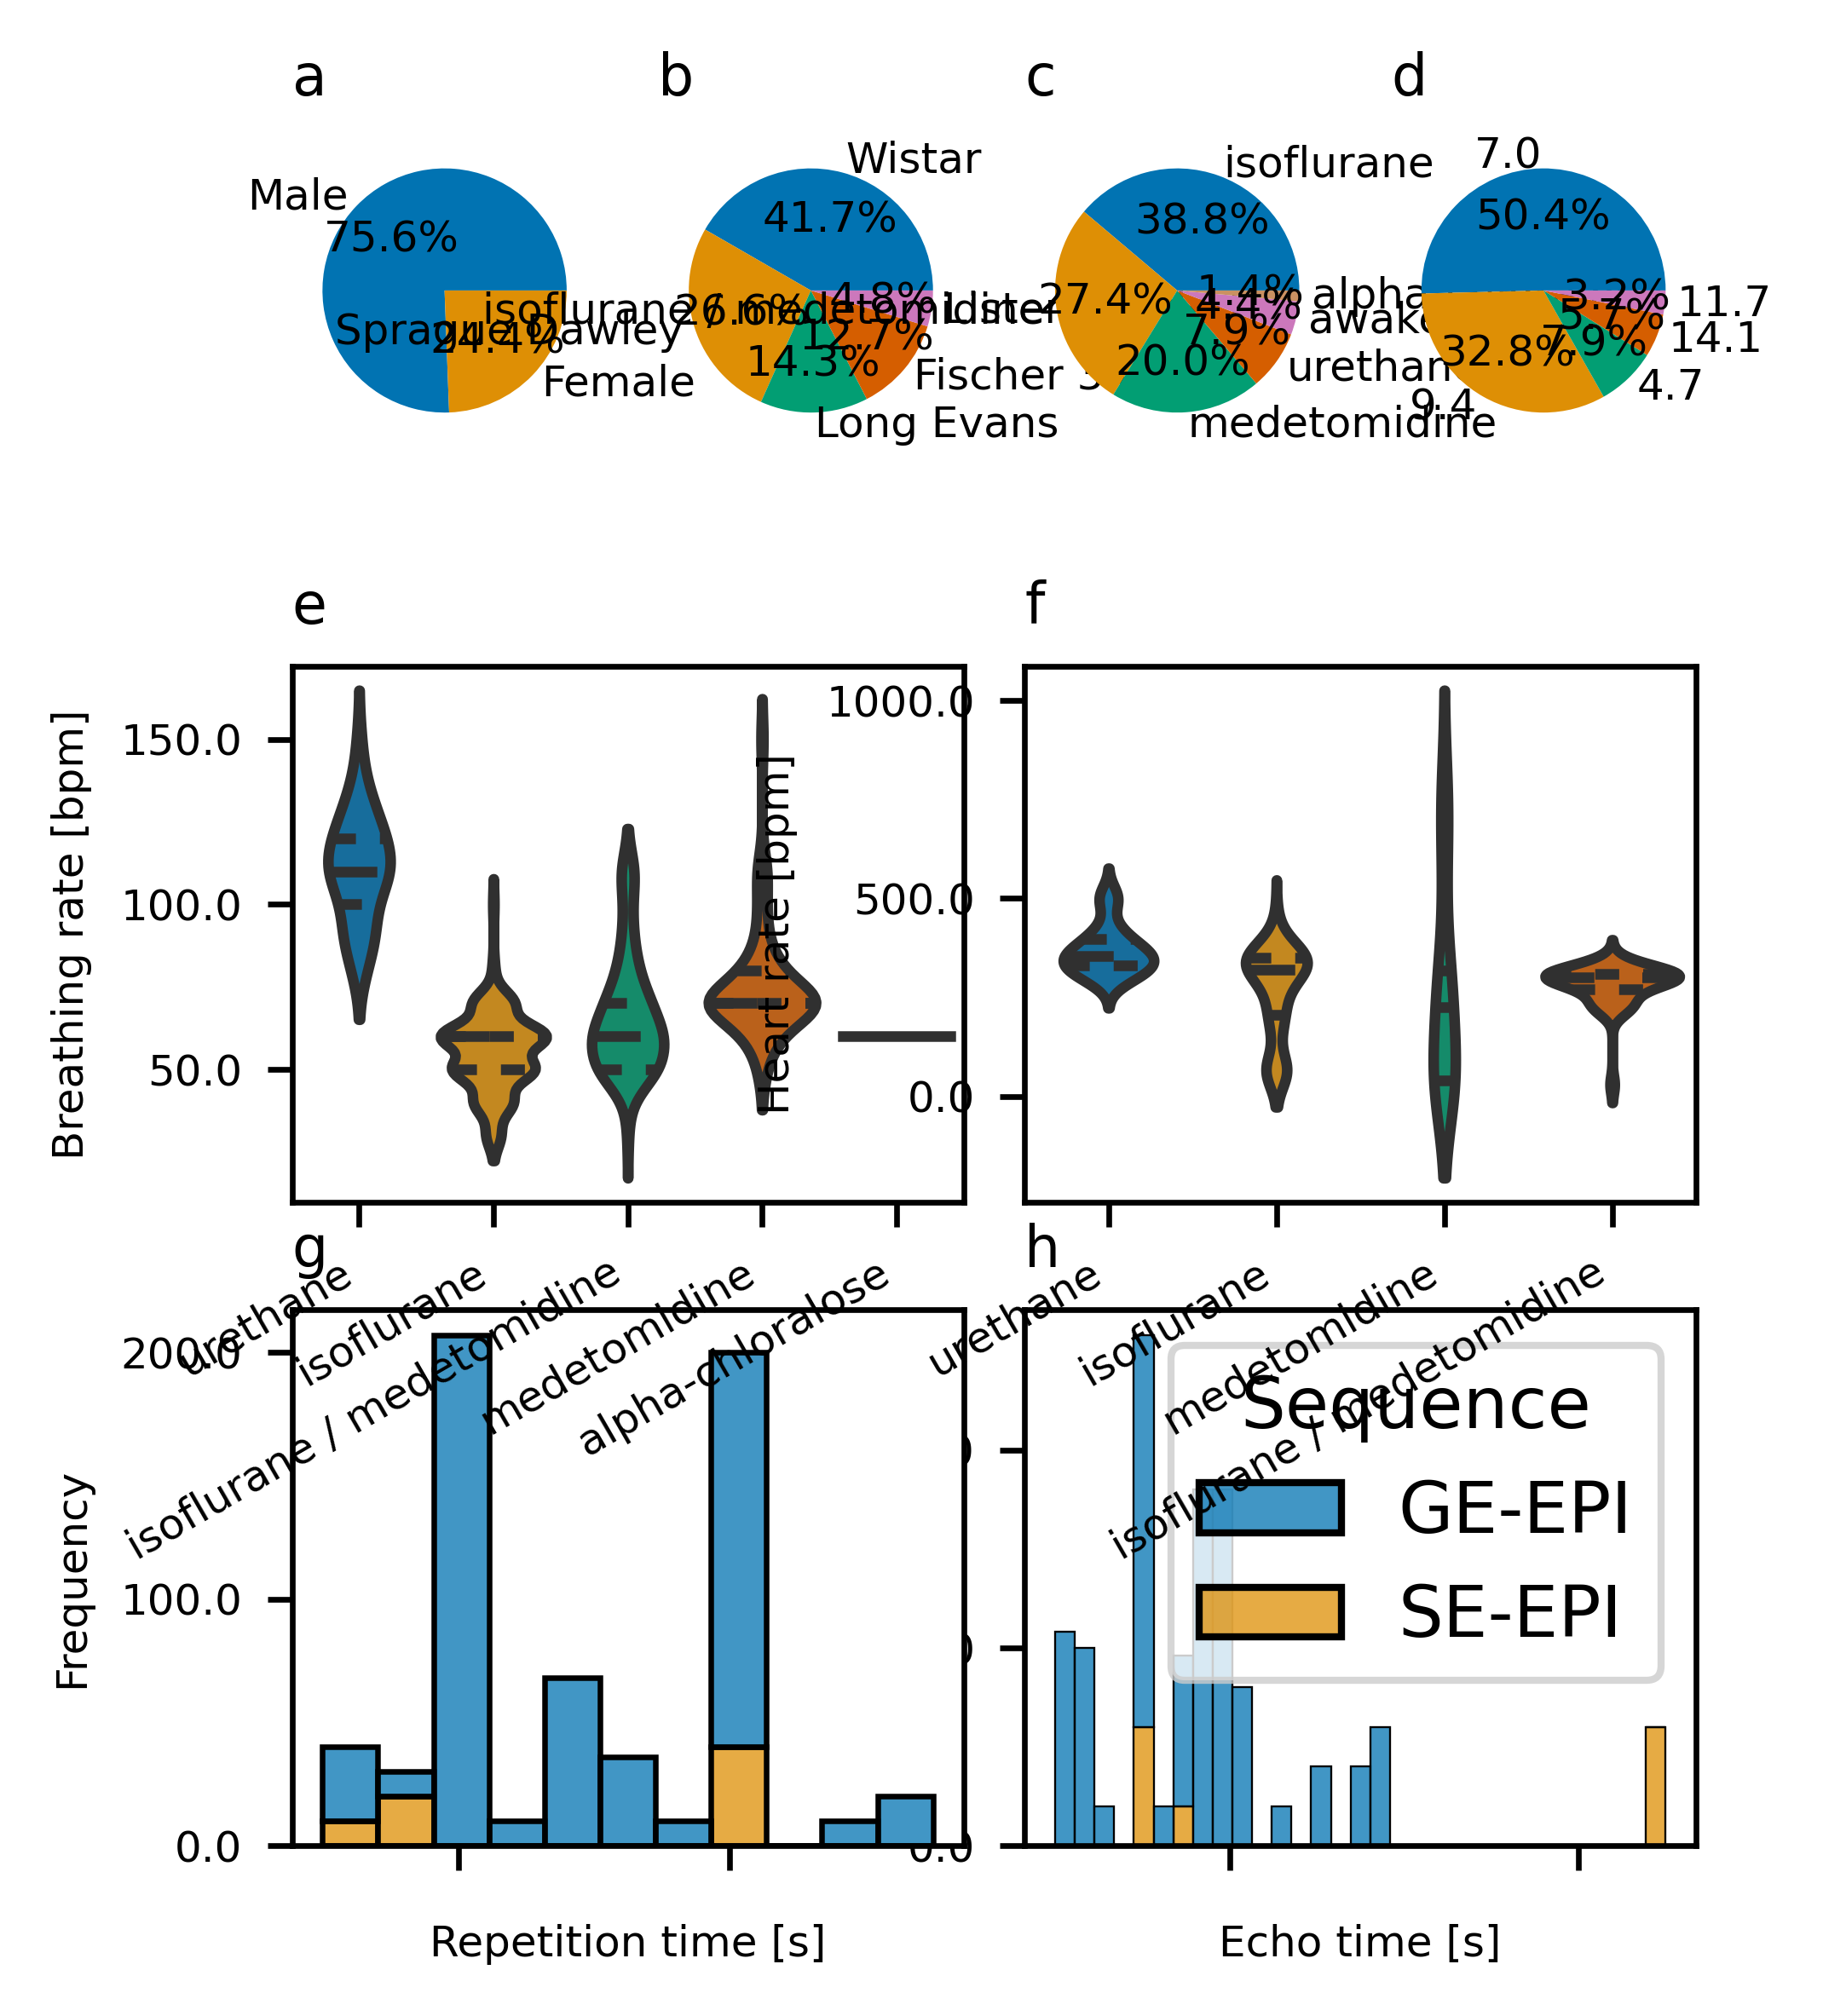

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("colorblind")

plt.rcParams['figure.dpi'] = 600


fig, axs = plt.subplot_mosaic([['a', 'b', 'c', 'd'], ['e', 'e', 'f', 'f'], ['g', 'g', 'h' ,'h']],
                            figsize=(90*mm, 120*mm), 
                              constrained_layout=True)

axa= df['rat.sex'].value_counts().plot.pie(ax = axs['a'], autopct="%.1f%%", fontsize=6)
axa.set_title('a', loc='left', fontsize=8)
axa.set(xlabel="", ylabel="")

axb = df['rat.strain'].value_counts().plot.pie(ax=axs['b'],autopct="%.1f%%", fontsize=6)
axb.set_title('b', loc='left', fontsize=8)
axb.set(xlabel="", ylabel="")

axc = df['anesthesia.maintenance'].value_counts().plot.pie(ax=axs['c'],autopct="%.1f%%", fontsize=6) 
axc.set_title('c', loc='left', fontsize=8)
axc.set(xlabel="", ylabel="")   

axd = df['MRI.field.strength'].value_counts().plot.pie(ax=axs['d'], autopct="%.1f%%", fontsize=6)
axd.set_title('d', loc='left', fontsize=8)
axd.set(xlabel="", ylabel="")  



df_tmp = df.dropna(subset=['anesthesia.breathing.rate'])
axe = sns.violinplot(x="anesthesia.maintenance", y="anesthesia.breathing.rate", data=df_tmp, inner="quartile",ax=axs['e'])
axe.set_xticklabels(axe.get_xticklabels(), rotation=30, ha='right', fontsize=6)
axe.set_yticklabels(axe.get_yticks(), ha='right', fontsize=6)
axe.set_xlabel("",fontsize=6)
axe.set_ylabel("Breathing rate [bpm]",fontsize=6)
axe.set_title('e', loc='left', fontsize=8)


df_tmp2 = df.dropna(subset=['anesthesia.heart.rate'])
axf = sns.violinplot(x="anesthesia.maintenance", y="anesthesia.heart.rate",  data=df_tmp2, inner="quartile", ax=axs['f'])
axf.set_xticklabels(axf.get_xticklabels(), rotation=30, ha='right', fontsize=6)
axf.set_yticklabels(axf.get_yticks(), ha='right', fontsize=6)
axf.set_xlabel("",fontsize=6)
axf.set_ylabel("Heart rate [bpm]",fontsize=6)
axf.set_title('f', loc='left', fontsize=8)

axg = sns.histplot(data=df, x="func.TR", hue="func.sequence", multiple="stack",ax=axs['g'])
axg.set_xlabel("Repetition time [s]", fontsize=6)
axg.set_ylabel("Frequency", fontsize=6)
axg.set_xticklabels(axg.get_xticklabels(), ha='right', fontsize=6)
axg.set_yticklabels(axg.get_yticks(), ha='right', fontsize=6)
axg.get_legend().remove()
axg.set_title('g', loc='left', fontsize=8)

axh = sns.histplot(data=df, x="func.TE", hue="func.sequence", multiple="stack",ax=axs['h'])
axh.set_xlabel("Echo time [s]", fontsize=6)
axh.set_ylabel("Frequency", fontsize=6)
axh.set_xticklabels(axh.get_xticklabels(), ha='right', fontsize=6)
axh.set_yticklabels(axh.get_yticks(), ha='right', fontsize=6)
axh.get_legend().set_title('Sequence')
axh.set_title('h', loc='left', fontsize=8)

#plt.tight_layout()

plt.savefig(os.path.join(init_folder,'assets','figure','Figure1.svg'), format="svg", dpi=600)
plt.savefig(os.path.join(init_folder,'assets','figure','Figure1.png'), format="png", dpi=600)


plt.show()

# Figure S1. Dataset description complement
a. Age in months   
b. Weight in g   


# Figure S2. Failed QA
a. Anatomical to template   
b. Functional to anatomical   


#### Failed anatomical to template registration

![func2anat](../assets/QC/sub-0104600_ses-1_T2w_inho_cor_registration.png)


#### Failed functional to anatomical registration

![func2anat](../assets/QC/sub-0101502_ses-1_run-1_bold_registration.png)

![func2anat](../assets/QC/sub-0104304_ses-1_run-1_bold_registration.png)

![func2anat](../assets/QC/sub-0104601_ses-1_run-1_bold_registration.png)

# Figure S3. tSNR
a. tSNR as a function of field strength   
b. tSNR as a function of repetition time   
c. tSNR as a function of echo time   
d. tSNR in the S1 and striatum   

# Figure S4 Motion
a. Mean framewise displacement as a function of strain   
b. Mean framewise displacement as a function of anesthesia   
c. Mean framewise displacement as a function of breathing rate   
d. Mean framewise displacement as a function of maximal framewise displacement   

# Figure 2 Seed-based analysis
a. Diagram illustrating the logic behind FC specificity   
b. FC relative to specific and unspecific ROI, along with example images.    
c. FC specificity as a function of nuisance regression   
d. FC incidence map   
e. test-retest   

# Figure 3 Independent component analysis
ICA components, incl labels from the SIGMA atlas. 

# Figure 4 Standard rat
a. Breathing rate   
b Heart rate   
c. Mean framewise displacement   
d. tSNR   
e. FC specificity   
f. FC incidence map   

# Figure S5 Standard rat individual SBA maps

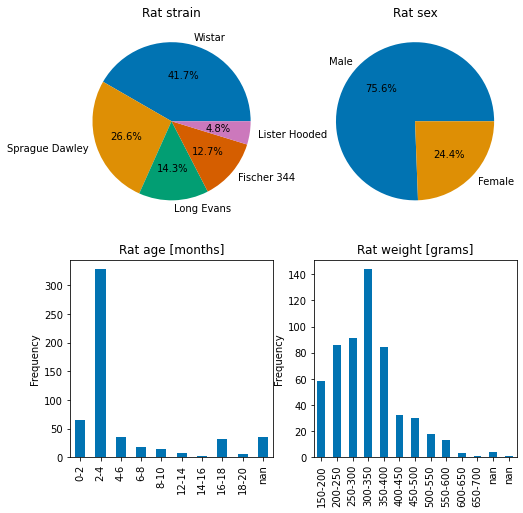

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("colorblind")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

df_age= df['rat.age'].value_counts().rename_axis('age').reset_index(name='counts')
df_age['age'] = pd.Categorical(df_age['age'], ["0-2", "2-4", "4-6","6-8","8-10","10-12","12-14","14-16","16-18","18-20"])

df_weight= df['rat.weight'].value_counts().rename_axis('weight').reset_index(name='counts')
df_weight['weight'] = pd.Categorical(df_weight['weight'] , ["150-200", 
                                                            "200-250", 
                                                            "250-300",
                                                            "300-350",
                                                            "350-400",
                                                            "400-450",
                                                            "450-500",
                                                            "500-550",
                                                            "550-600",
                                                            "600-650",
                                                            "650-700"])



ax1 = df['rat.sex'].value_counts().plot.pie(title='Rat sex',ax=axes[0,1],autopct="%.1f%%")
ax2 = df['rat.strain'].value_counts().plot.pie(title='Rat strain',ax=axes[0,0],autopct="%.1f%%")
ax3 = df_age.sort_values(by=['age']).plot.bar(x='age',y='counts', title='Rat age [months]',ax=axes[1,0])
ax4 = df_weight.sort_values(by=['weight']).plot.bar(x='weight',y='counts', title='Rat weight [grams]',ax=axes[1,1])

ax1.set(xlabel="", ylabel="")
ax2.set(xlabel="", ylabel="")
ax3.set(xlabel="", ylabel="Frequency")
ax4.set(xlabel="", ylabel="Frequency")
ax3.get_legend().remove()
ax4.get_legend().remove()

[Text(0.5, 0, 'Heart rate [bpm]')]

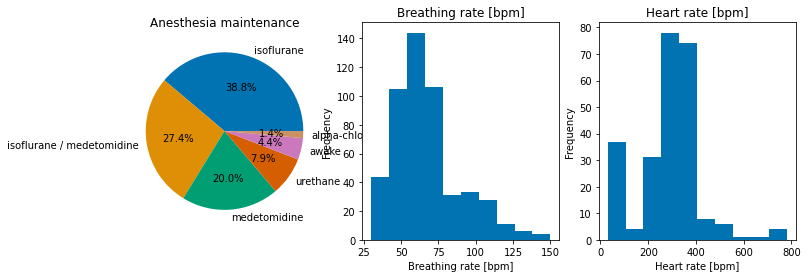

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4))

sns.set_palette("colorblind")

#ax1 = df['exp.type'].value_counts().plot.pie(title='Experiment type',ax=axes[0,1], autopct="%.1f%%")
ax2 = df['anesthesia.maintenance'].value_counts().plot.pie(title='Anesthesia maintenance',ax=axes[0],autopct="%.1f%%")    
ax3 = df['anesthesia.breathing.rate'].plot.hist(title='Breathing rate [bpm]',ax=axes[1])
ax4 = df['anesthesia.heart.rate'].plot.hist(title='Heart rate [bpm]',ax=axes[2])

#ax1.set(xlabel="", ylabel="")
ax2.set(xlabel="", ylabel="")
ax3.set(xlabel="Breathing rate [bpm]")
ax4.set(xlabel="Heart rate [bpm]")

[Text(0.5, 0, ''),
 Text(0, 0.5, 'Heart rate [bpm]'),
 Text(0.5, 1.0, 'Anesthesia maintenance')]

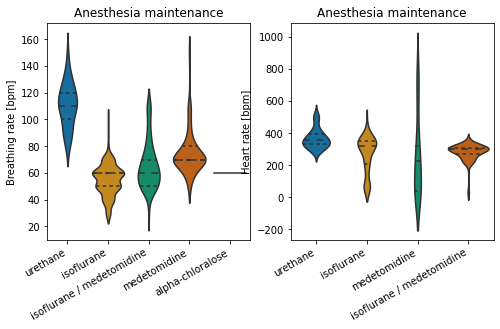

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

sns.set_palette("colorblind")

df_tmp = df.dropna(subset=['anesthesia.breathing.rate'])
ax1 = sns.violinplot(x="anesthesia.maintenance", y="anesthesia.breathing.rate", data=df_tmp, inner="quartile",ax=axes[0])

df_tmp2 = df.dropna(subset=['anesthesia.heart.rate'])
ax2 = sns.violinplot(x="anesthesia.maintenance", y="anesthesia.heart.rate",  data=df_tmp2, inner="quartile", ax=axes[1])

                         
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')
ax1.set(xlabel='', ylabel='Breathing rate [bpm]', title='Anesthesia maintenance')

ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30, ha='right')
ax2.set(xlabel='', ylabel='Heart rate [bpm]', title='Anesthesia maintenance')

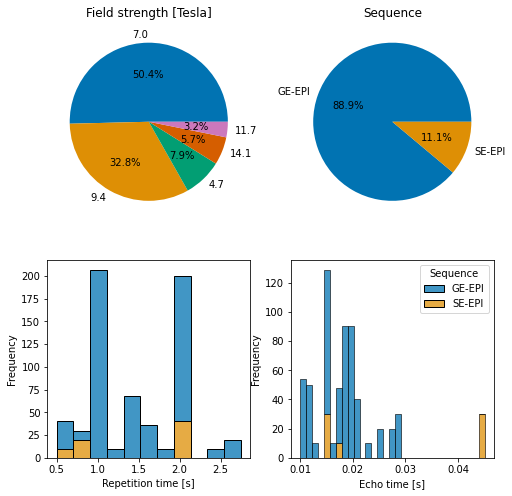

In [35]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

sns.set_palette("colorblind")

ax1 = df['MRI.field.strength'].value_counts().plot.pie(title='Field strength [Tesla]',ax=axes[0,0], autopct="%.1f%%")
ax2 = df['func.sequence'].value_counts().plot.pie(title='Sequence',ax=axes[0,1], autopct="%.1f%%")
ax3 = sns.histplot(data=df, x="func.TR", hue="func.sequence", multiple="stack",ax=axes[1,0])
ax4 = sns.histplot(data=df, x="func.TE", hue="func.sequence", multiple="stack",ax=axes[1,1])

ax1.set(xlabel="", ylabel="")
ax2.set(xlabel="", ylabel="")
ax3.set(xlabel="Repetition time [s]", ylabel="Frequency")
ax4.set(xlabel="Echo time [s]", ylabel="Frequency")
ax4.get_legend().set_title('Sequence')
ax3.get_legend().remove()
